In [16]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [17]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**5)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=1024)

In [18]:
from pushforward_operators import AmortizedNeuralQuantileRegression
from classes import TrainParameters

In [19]:
quantile = AmortizedNeuralQuantileRegression(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=4,
    potential_to_estimate_with_neural_network='y'
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=10,
    optimizer_parameters=dict(
        lr=1e-2,
        weight_decay=1e-4
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True,
    warmup_iterations=2
)

In [20]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters,
)

Warm up iteration: 2 Potential loss: 0.030, Amortization loss: 0.033: 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]
Epoch: 10, Potential Objective: 1.477, Amortization Objective: 0.340, Potential LR: 0.000000, Amortized LR: 0.000302: 100%|██████████| 10/10 [01:44<00:00, 10.49s/it]


In [21]:
path_for_models_weights = "../attic/models/amortized_neural_quantile/amortized_neural_quantile_picnn_banana_y.pth"
quantile.save(path=path_for_models_weights)
# quantile = AmortizedNeuralQuantileRegression.load_class(path=path_for_models_weights).eval()

In [22]:
X_sample = X_train[0, :].repeat(10000, 1)
U_sample = torch.randn(10000, 2)

with torch.no_grad():
    potential_function = quantile.potential_network(X_sample, U_sample)

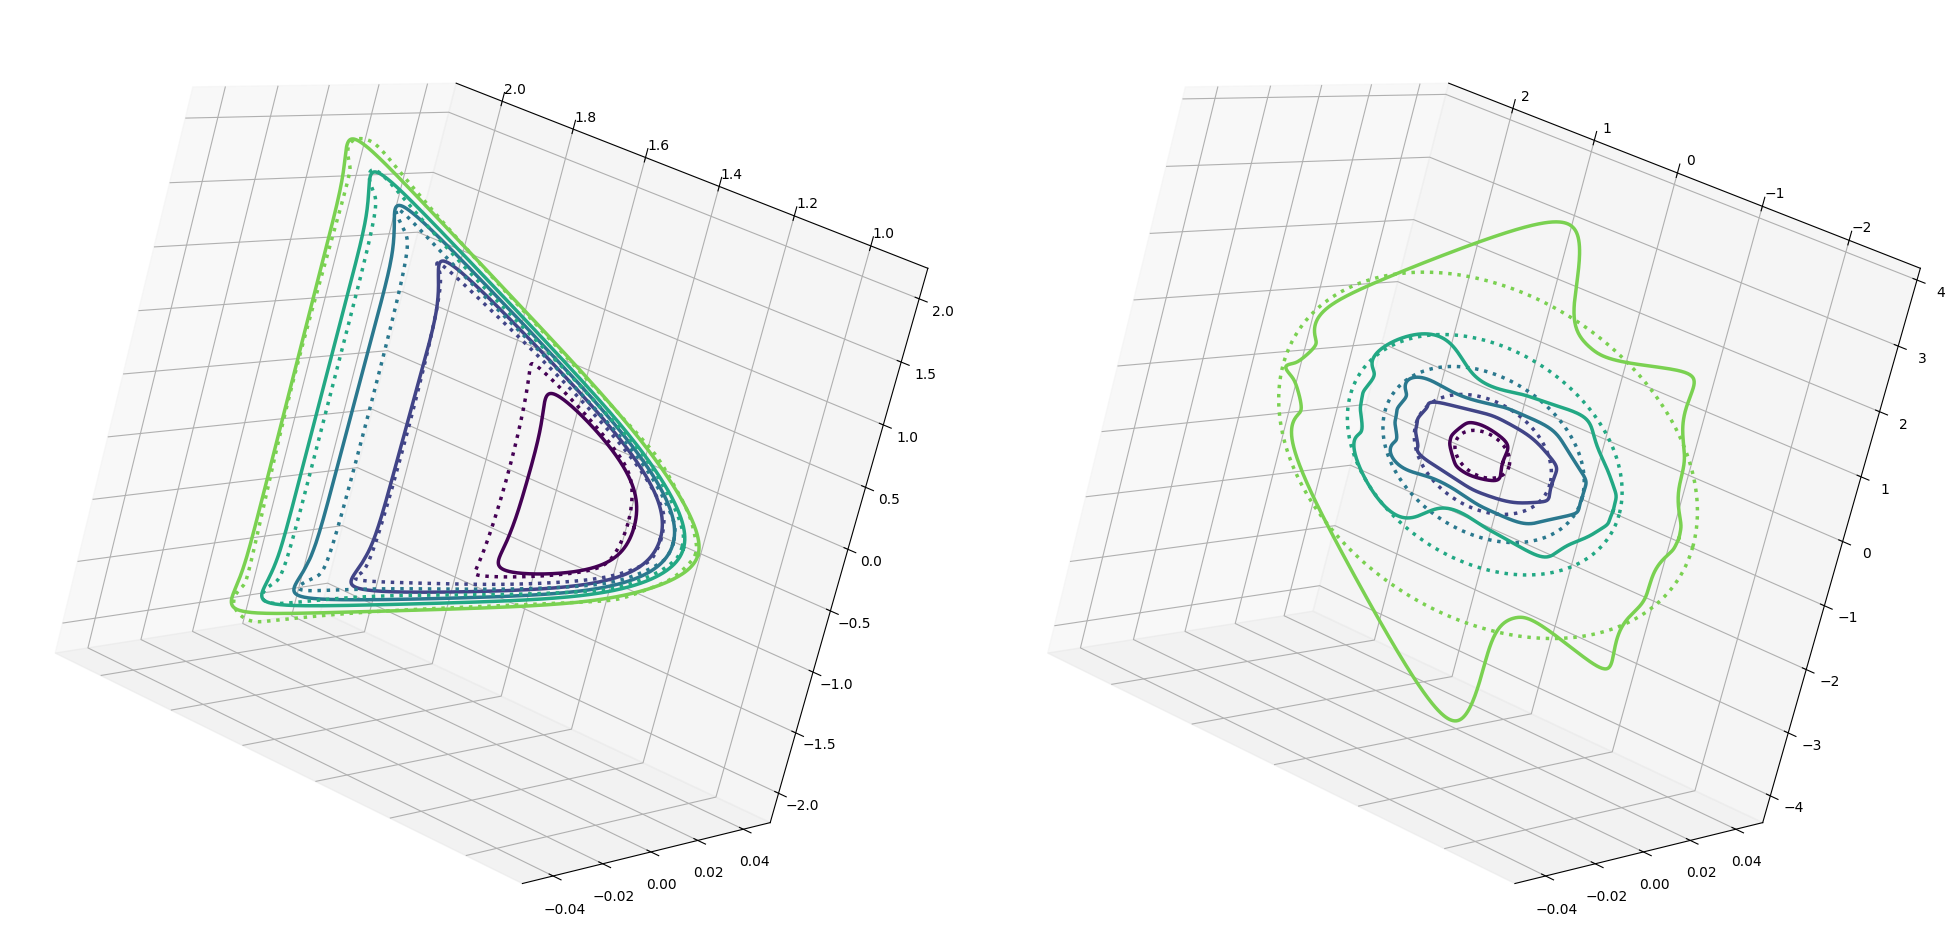

In [23]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.6]]),
    number_of_quantile_levels=5, tensor_parameters={}
)